In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import numpy as np

In [14]:

# our data is  stored in a csv file inside the activities folder 
df = pd.read_csv('activities\\all_activities_data.csv')



In [15]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [16]:
# Function to calculate distance between two points
def haversine_distance(lat1, lon1, lat2, lon2):
    from math import radians, sin, cos, sqrt, atan2
    R = 6371  # Earth radius in kilometers

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c


In [17]:
# Calculate distance and duration for each activity
def calculate_activity_stats(group):
    duration = (group['timestamp'].max() - group['timestamp'].min()).total_seconds() / 3600  # in hours
    distances = [haversine_distance(group['latitude'].iloc[i], group['longitude'].iloc[i],
                                    group['latitude'].iloc[i+1], group['longitude'].iloc[i+1])
                 for i in range(len(group)-1)]
    total_distance = sum(distances)
    avg_speed = total_distance / duration if duration > 0 else 0  # km/h
    return pd.Series({'duration': duration, 'distance': total_distance, 'avg_speed': avg_speed})

In [18]:
# Group by file_name and activity_type, then apply our custom function
activity_stats = df.groupby(['file_name', 'activity_type']).apply(calculate_activity_stats).reset_index()

C:\Users\leoko\AppData\Local\Temp\ipykernel_17636\2476603758.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  activity_stats = df.groupby(['file_name', 'activity_type']).apply(calculate_activity_stats).reset_index()


In [19]:
# Basic statistics
print("Activity Summary:")
summary = activity_stats.groupby('activity_type').agg({
    'distance': ['count', 'mean', 'sum'],
    'duration': ['mean', 'sum'],
    'avg_speed': 'mean'
})
summary.columns = ['count', 'avg_distance', 'total_distance', 'avg_duration', 'total_duration', 'avg_speed']
print(summary)

Activity Summary:
               count  avg_distance  total_distance  avg_duration  \
activity_type                                                      
cycling          167     18.380960     3069.620348      1.166884   
other              1      1.091648        1.091648      0.367500   
running            0           NaN        0.000000      0.437778   
swim               2      1.217355        2.434709      0.923472   
walking            6      2.726478       16.358869      0.996429   

               total_duration  avg_speed  
activity_type                             
cycling            661.623056  11.587407  
other                0.367500   2.970471  
running              0.437778        NaN  
swim                 1.846944   1.207535  
walking              6.975000   3.575139  


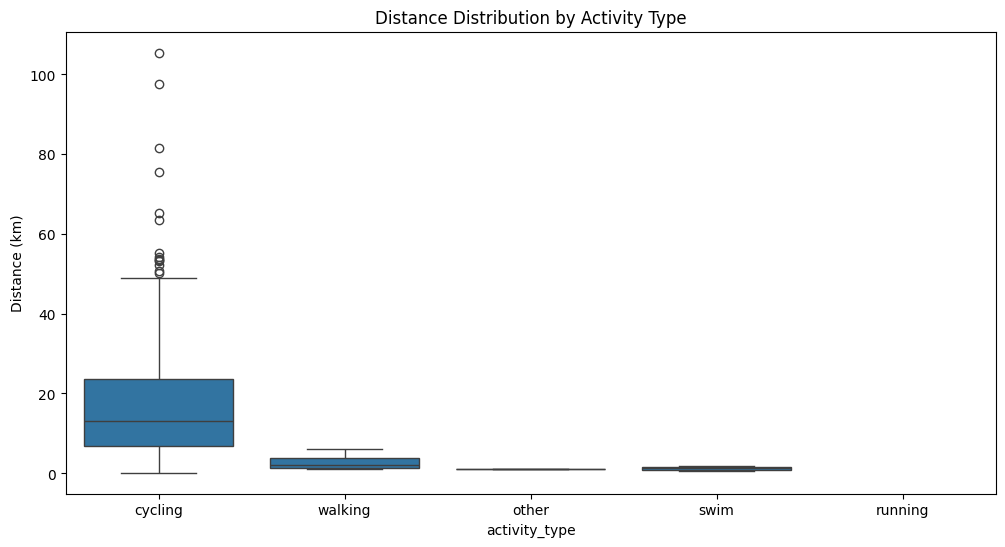

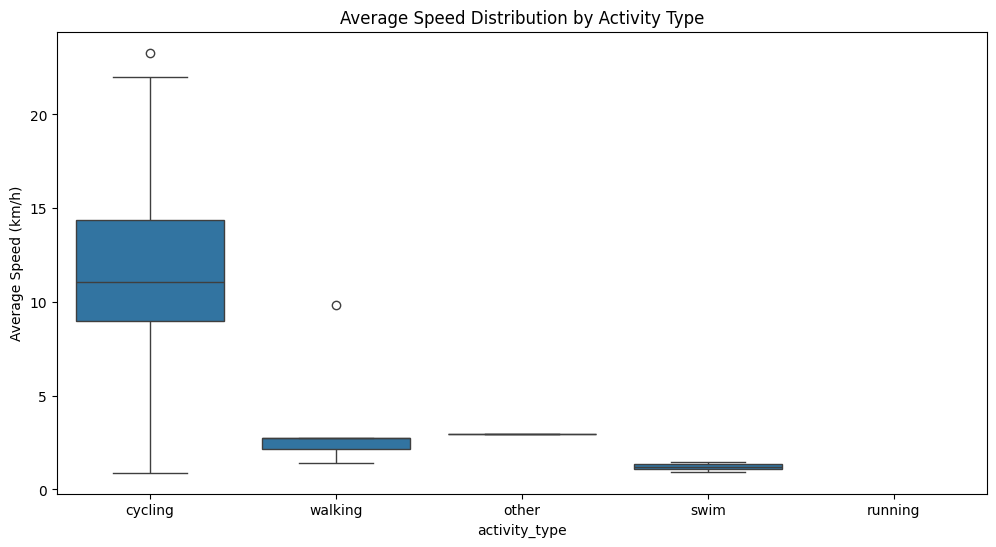

In [24]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.boxplot(x='activity_type', y='distance', data=activity_stats)
plt.title('Distance Distribution by Activity Type')
plt.ylabel('Distance (km)')
plt.savefig('distance_by_activity.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='activity_type', y='avg_speed', data=activity_stats)
plt.title('Average Speed Distribution by Activity Type')
plt.ylabel('Average Speed (km/h)')
plt.savefig('speed_by_activity.png')
plt.show()

<Figure size 1500x800 with 0 Axes>

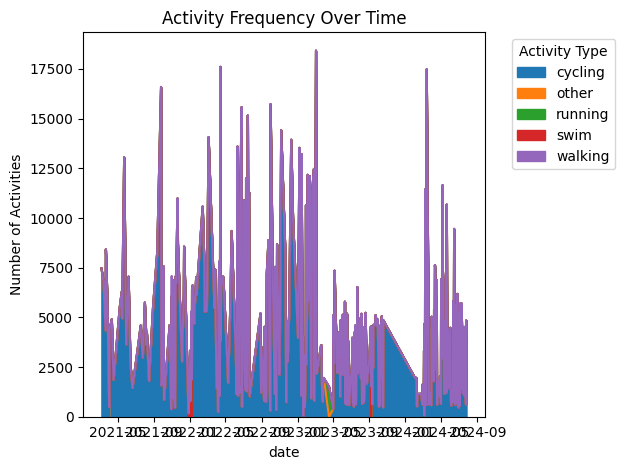

In [25]:
# Activity frequency over time
df['date'] = df['timestamp'].dt.date
activity_frequency = df.groupby(['date', 'activity_type']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 8))
activity_frequency.plot(kind='area', stacked=True)
plt.title('Activity Frequency Over Time')
plt.ylabel('Number of Activities')
plt.legend(title='Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('activity_frequency.png')
plt.show()


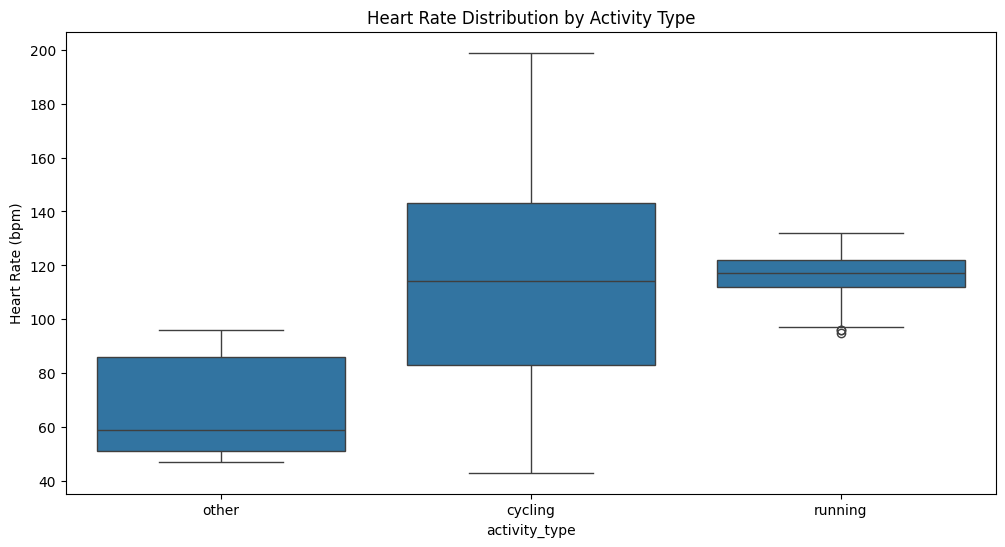

In [26]:
# Heart rate analysis (if available)
if 'heart_rate' in df.columns and df['heart_rate'].notna().any():
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='activity_type', y='heart_rate', data=df[df['heart_rate'].notna()])
    plt.title('Heart Rate Distribution by Activity Type')
    plt.ylabel('Heart Rate (bpm)')
    plt.savefig('heart_rate_by_activity.png')
    plt.show()


<Figure size 1200x600 with 0 Axes>

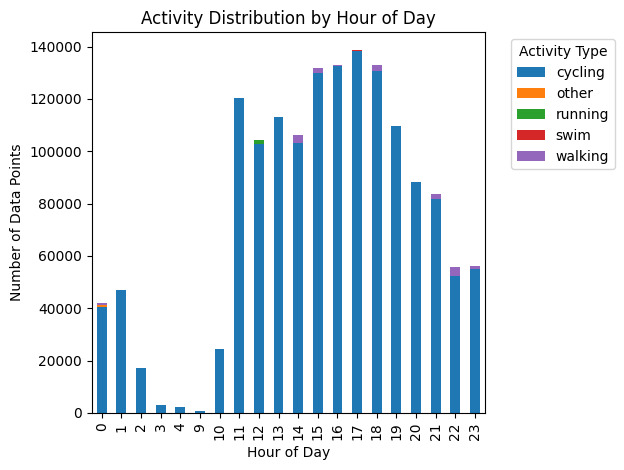

Analysis complete. Check the generated PNG files for visualizations.


In [27]:
# Time of day analysis
df['hour'] = df['timestamp'].dt.hour
hourly_activity = df.groupby(['hour', 'activity_type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
hourly_activity.plot(kind='bar', stacked=True)
plt.title('Activity Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Data Points')
plt.legend(title='Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('hourly_activity.png')
plt.show()

print("Analysis complete. Check the generated PNG files for visualizations.")